#### Sample correlation

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Base_dir = 'C:/github/LiverDeconv' # cloning repository

import sys
sys.path.append(Base_dir)
import liver_deconv as ld
from _utils import processing as pc

In [2]:
#%% load data
df_mix = pd.read_csv(Base_dir+'/data/processed/mix_processed.csv',index_col=0)
ans_df = pd.read_csv('C:/github/LiverDeconv/Data/processed/facs_true_population.csv',index_col=0).T
common = sorted(set(df_mix.columns) & set(ans_df.columns))
remove_list=["CIV_7","CIV_8","CIP_7","CIP_8"]
target_mix = df_mix.drop(columns=remove_list)
#%% normalize with Ctrl expression
print(target_mix.columns.tolist())
ctrl_df = target_mix[['Ctrl_1', 'Ctrl_10', 'Ctrl_12', 'Ctrl_15', 'Ctrl_16', 'Ctrl_17', 'Ctrl_18', 'Ctrl_2', 'Ctrl_3', 'Ctrl_4', 'Ctrl_7', 'Ctrl_8', 'Ctrl_9']]
ctrl_m = ctrl_df.T.mean()
ctrl_v = ctrl_df.T.var()

norm_df = (((target_mix.T-ctrl_m))/np.sqrt(ctrl_v)).T # normalization 

['ANIT_1', 'ANIT_2', 'ANIT_3', 'ANIT_4', 'APAP_1', 'APAP_11', 'APAP_2', 'APAP_4', 'APAP_6', 'APAP_8', 'Ctrl_1', 'Ctrl_10', 'Ctrl_12', 'Ctrl_15', 'Ctrl_16', 'Ctrl_17', 'Ctrl_18', 'Ctrl_2', 'Ctrl_3', 'Ctrl_4', 'CCl4_1', 'CCl4_10', 'CCl4_11', 'CCl4_12', 'CCl4_5', 'CCl4_6', 'CCl4_8', 'Ctrl_7', 'Ctrl_8', 'Ctrl_9', 'ConA_11', 'ConA_12', 'ConA_2', 'ConA_3', 'ConA_4', 'ConA_5', 'ConA_8', 'MDA_1', 'MDA_2', 'MDA_3', 'MDA_4', 'MDA_12', 'MDA_7', 'MDA_8', 'TAA_1', 'TAA_3', 'TAA_6', 'TAA_7', 'TAA_8', 'GAL_2', 'GAL_4', 'GAL_7', 'GAL_8']


In [4]:
#%% DEG definition
import seaborn as sns

dat = ld.LiverDeconv()
dat.set_data(df_mix=target_mix, df_all=target_mix)
dat.pre_processing(do_ann=False,ann_df=None,do_log2=False,do_quantile=False,do_trimming=False,do_drop=True)
dat.narrow_intersec()
dat.create_ref(sep="_",number=100000,limit_CV=np.inf,limit_FC=-1,log2=False,verbose=True)
final_ref = dat.final_ref
deg_dic = dat.deg_dic

(11588, 53)
(11588, 53)
drop nan
narrowd gene number : 11588
not enough genes picked up
not enough genes picked up
not enough genes picked up
not enough genes picked up
not enough genes picked up
not enough genes picked up
not enough genes picked up
not enough genes picked up
signature genes : 11588


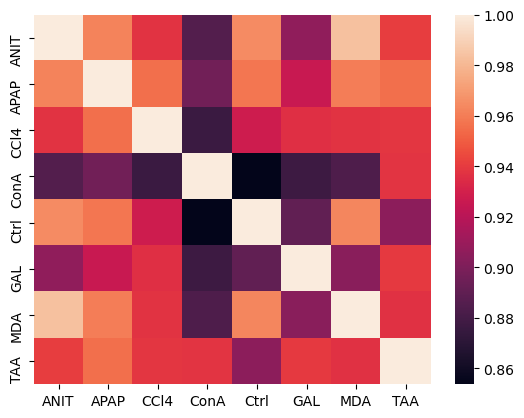

In [5]:
cor = final_ref.corr()
sns.heatmap(cor)
plt.show()

In [6]:
#%% DEG definition
import seaborn as sns

dat = ld.LiverDeconv()
dat.set_data(df_mix=target_mix, df_all=target_mix)
dat.pre_processing(do_ann=False,ann_df=None,do_log2=False,do_quantile=False,do_trimming=False,do_drop=True)
dat.narrow_intersec()
dat.create_ref(sep="_",number=50,limit_CV=10,limit_FC=1.2,log2=False,verbose=True)
final_ref = dat.final_ref
deg_dic = dat.deg_dic

(11588, 53)
(11588, 53)
drop nan
narrowd gene number : 11588
not enough genes picked up
not enough genes picked up
not enough genes picked up
not enough genes picked up
not enough genes picked up
not enough genes picked up
signature genes : 218


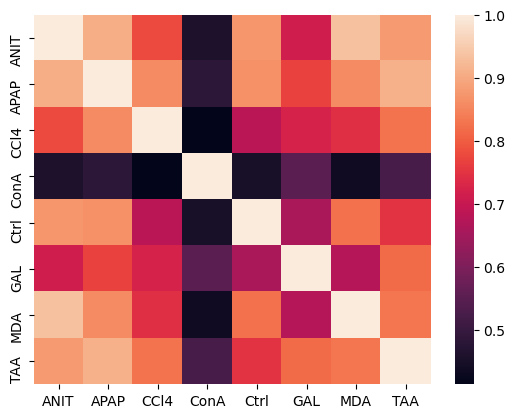

In [7]:
cor = final_ref.corr()
sns.heatmap(cor)
plt.show()